In [1]:
import keras
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob

Using TensorFlow backend.


In [2]:
list_img = []
for name in glob.glob('caltech101/*'):
        path = name + '/*.*'
        for tmp in glob.glob(path):
            list_img.append(tmp)
print list_img

['caltech101/revolver/image_0033.jpg', 'caltech101/revolver/image_0062.jpg', 'caltech101/revolver/image_0044.jpg', 'caltech101/revolver/image_0017.jpg', 'caltech101/revolver/image_0007.jpg', 'caltech101/revolver/image_0060.jpg', 'caltech101/revolver/image_0064.jpg', 'caltech101/revolver/image_0003.jpg', 'caltech101/revolver/image_0011.jpg', 'caltech101/revolver/image_0054.jpg', 'caltech101/revolver/image_0070.jpg', 'caltech101/revolver/image_0037.jpg', 'caltech101/revolver/image_0082.jpg', 'caltech101/revolver/image_0065.jpg', 'caltech101/revolver/image_0008.jpg', 'caltech101/revolver/image_0031.jpg', 'caltech101/revolver/image_0057.jpg', 'caltech101/revolver/image_0075.jpg', 'caltech101/revolver/image_0027.jpg', 'caltech101/revolver/image_0040.jpg', 'caltech101/revolver/image_0004.jpg', 'caltech101/revolver/image_0079.jpg', 'caltech101/revolver/image_0023.jpg', 'caltech101/revolver/image_0002.jpg', 'caltech101/revolver/image_0021.jpg', 'caltech101/revolver/image_0063.jpg', 'caltech101

In [3]:
link_img =  np.array(list_img)
print link_img.shape

(8677,)


In [4]:
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [5]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
def printme( num_classes ):
    if num_classes < 10:
        num_classes = '00' + str(num_classes)
    elif num_classes < 100:
        num_classes = '0' + str(num_classes)
    with open("vgg16_classes.txt") as openfile:
        for line in openfile:
            for part in line.split():
                if str(num_classes) in part:
                    print line

In [8]:
def show_img(img_path):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [9]:
def test_img(num_img):
    img_path = link_img[num_img]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features = model.predict(x)
    label = np.argmax(features)
    printme(label)
    
    show_img(img_path)
    
    plt.plot(features.ravel())
    plt.show()
    
    

504 coffee mug



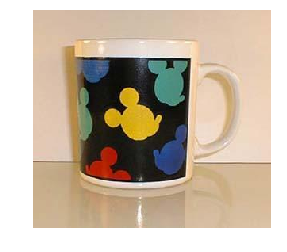

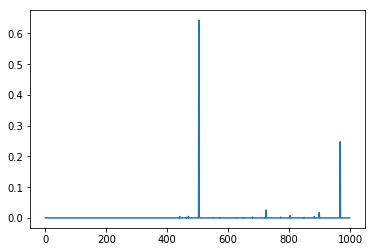

'caltech101/cup/image_0053.jpg'

In [10]:
num_rd = np.random.randint(0,len(link_img))
test_img(num_rd)
link_img[num_rd]